#Importar librerias y DataSet

In [3]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Load data
titanic = sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


#Obtener los datos 

In [ ]:
#Count the number of rows and columns
titanic.shape

(891, 15)

In [ ]:
#Get some statistics
titanic.describe()

In [ ]:
#Get a count of the number of survivors
titanic['survived'].value_counts()

#Visualizar los survivors

In [2]:
#Visualizar el numero de survivors
sns.countplot(titanic['survived'])

NameError: ignored

In [ ]:
#visualize the count of survivors for columns 'who','sex','pclass','sibsp','parch','embarked'
cols = ['who','sex','pclass','sibsp','parch','embarked']
n_rows = 2
n_cols = 3

#subplot grid and figue size of each graph
fig, axs = plt.subplots(n_rows,n_cols,figsize = (n_cols * 3.2, n_rows * 3.2))

for r in range(0,n_rows):
  for c in range(0,n_cols):

    i = r*n_cols + c #index to go through the number of columns
    ax = axs[r][c] #show where to position each subplot
    sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='survived',loc = 'upper right')
plt.tight_layout()

#Dividir y visualizar los datos por clase y sexo

In [ ]:
#Look at survival rate by sex
titanic.groupby('sex')[['survived']].mean()


In [ ]:
#Look at survival rate by sex and class
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


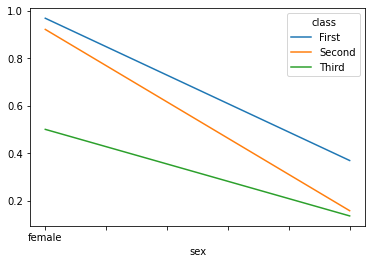

In [ ]:
#look at survival rate by sex and class visually
titanic.pivot_table('survived', index='sex',columns='class').plot()

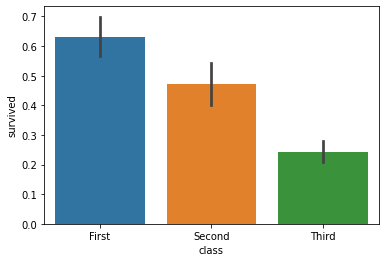

In [ ]:
#Plot the survival rate of each class
sns.barplot(x='class', y='survived',data=titanic)

In [ ]:
#Suvival rate by sex, age and class
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

#Visualizar los pagos de cada clase

In [ ]:
#plot the prices paid of each class
plt.scatter(titanic['fare'],titanic['class'],color='purple',label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

#Contar los valores vacios en cada columna y eliminarlos

In [ ]:
#Count the empty values in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#Look at all of the values in each column & get a count
for val in titanic:
  print(titanic[val].value_counts())
  print()

In [ ]:
#Drop the columns
titanic=titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'], axis=1)
#remove the rows with missing values
titanic = titanic.dropna( subset = ['embarked', 'age'])


In [ ]:
#Count the NEW number of rows and columns in the data set
titanic.shape

(712, 8)

#Vemos valores unicos de 'sex' y 'embarked' y los convertimos en valores que podemos utilizar

In [ ]:
#Look at the data
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
#Print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode the sex column
titanic.iloc[:,2] = labelencoder.fit_transform(titanic.iloc[:,2].values)
#Encode the embarked column
titanic.iloc[:,7] = labelencoder.fit_transform(titanic.iloc[:,7].values)

In [ ]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

#Dividimos el data para el training y testing

In [ ]:
#split the data into independent 'X' and independent 'Y variables

X = titanic.iloc[:, 1:8].values
y = titanic.iloc[:,0].values

In [ ]:
#Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state = 0)

In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


#Creamos los modelos para entrenar los datos

In [ ]:
#Create a function with many machine learning models
def models(X_train, y_train):

  #Use Logistic regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train,y_train)

  #Use KNeighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn =KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
  knn.fit(X_train,y_train)

  #Use SVC (linear kernel)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel='linear',random_state = 0)
  svc_lin.fit(X_train, y_train)

  #Use SVC (RBF kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel='rbf', random_state=0)
  svc_rbf.fit(X_train,y_train)

  #Use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train,y_train)

  #use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train,y_train)

  #Use the RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  forest.fit(X_train,y_train)

  #print training accuracy for each model
  print('[0]Logistic Regression Training Accuracy', log.score(X_train,y_train))
  print('[1]K Neighbors Training Accuracy', knn.score(X_train,y_train))
  print('[2]SVC Linear Training Accuracy', svc_lin.score(X_train,y_train))
  print('[3]SVC RBF Training Accuracy', svc_rbf.score(X_train,y_train))
  print('[4]Gaussian NB Training Accuracy', gauss.score(X_train,y_train))
  print('[5]Decision Tree Training Accuracy', tree.score(X_train,y_train))
  print('[6]Random Forest Training Accuracy', forest.score(X_train,y_train))

  return log, knn, svc_lin,svc_rbf,gauss,tree,forest

#Entrenamos los modelos

In [ ]:
#Get and train all the models
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy 0.7978910369068541
[1]K Neighbors Training Accuracy 0.8664323374340949
[2]SVC Linear Training Accuracy 0.7768014059753954
[3]SVC RBF Training Accuracy 0.8506151142355008
[4]Gaussian NB Training Accuracy 0.8031634446397188
[5]Decision Tree Training Accuracy 0.9929701230228472
[6]Random Forest Training Accuracy 0.9753954305799648


#Verificacion

In [ ]:
#Show the confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  cm = confusion_matrix(y_test,model[i].predict(X_test))

  #Extract the TN, FP, FN, TP
  TN, FP, FN, TP = confusion_matrix(y_test,model[i].predict(X_test)).ravel()

  test_score = (TP + TN) / (TP + TN + FN + FP)

  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
  print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



#Visualizamos la importancia del modelo de forest

In [ ]:
#Get feature importance
forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:,1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

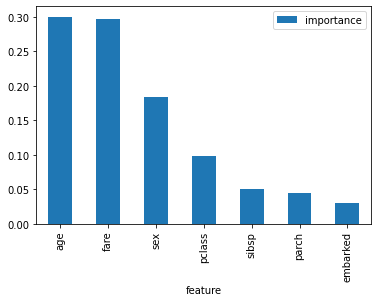

In [ ]:
#Visualize the importance
importances.plot.bar()

#Impimimos la prediccion de random forest classifier

In [ ]:
#Print the prediction of the random forest classifier
pred = model[6].predict(X_test)
print(pred)

print()

#Print the actual values
print(y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]
